In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-02-13 10:45:58--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  51.0MB/s    in 1.6s    

2020-02-13 10:45:59 (51.0 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [0]:
!tar -xzf aclImdb_v1.tar.gz

In [0]:
from os import walk
import re
train_negatives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/train/neg"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/train/neg/" + f).read())
      train_negatives.append(text)

In [0]:
train_positives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/train/pos"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/train/pos/" + f).read())
      train_positives.append(text)

In [5]:
train_data = train_negatives + train_positives
print(train_data[0])

Don't bother. A little prosciutto could go a long way, but all we get is pure ham, particularly from Dunaway. The plot is one of those bumper car episodes... the vehicle bounces into another and everything changes direction again, until we are merely scratching our heads wondering if there were ever a plot. Gina Phillips is actually good, but it's hard playing across from a mystified Dunaway playing Lady Macbeth lost in the Marx's Brother's Duck Soup. Ah, the Raven...now there's an actor. And there is the relative who just lies and bed and looks ghostly. Or Dr. Dread who's filled with lots of gloom and no working remedies. I'm one of those suckers who just has to see a movie to the end. Quoth the Raven, "Nevermore."


In [6]:
test_negatives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/test/neg"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/test/neg/" + f).read())
      test_negatives.append(text)
test_positives = []
for (dirpath, dirnames, filenames) in walk("aclImdb/test/pos"):
    for f in filenames:
      text = re.sub('<[^>]*>', '', open("aclImdb/test/pos/" + f).read())
      test_positives.append(text)
test_data = test_negatives + test_positives
len(test_data)

25000

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_data)
X_train_counts.shape
X_test = count_vect.transform(test_data)

In [0]:
classes = [0] * 12500 + [1] * 12500

In [0]:
class Metrics:
  def __init__(self):
    self.set_initial()
  def set_initial(self):
    self.tp = 0
    self.tn = 0
    self.fn = 0
    self.fp = 0
  def fit(self, predicted, real):
    self.set_initial()
    for i in range(len(predicted)):
      p = predicted[i]
      r = real[i]
      if p == 1:
        if p == r:
          self.tp += 1
        else:
          self.fp += 1
      else:
        if p == r:
          self.tn += 1
        else:
          self.fn += 1
  def acc(self):
    return (self.tp + self.tn)/(self.tp + self.tn + self.fp + self.fn)
  def prec(self):
    return self.tp/(self.tp + self.fp)
  def rec(self):
    return self.tp/(self.tp + self.fn)
  def f1(self):
    return 2 * self.prec() * self.rec() / (self.prec() + self.rec())

#Multinomial naive Bayes classifier

In [0]:
from sklearn.naive_bayes import MultinomialNB
multi_clf = MultinomialNB().fit(X_train_counts, classes)

In [0]:
multi_predicted = multi_clf.predict(X_test)
multi_predicted_proba = multi_clf.predict_proba(X_test)

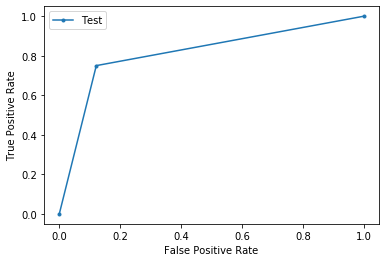

acc: 0.81432
True
f1: 0.8016069749551245
True
p: 0.8605248669480638
True
r: 0.75024
True
roc auc score: 0.8143199999999999


In [12]:
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score, recall_score
m = Metrics()
m.fit(multi_predicted, classes)
acc = accuracy_score(classes, multi_predicted)
f1 = f1_score(classes, multi_predicted)
p = precision_score(classes, multi_predicted)
r = recall_score(classes, multi_predicted)

fpr, tpr, _ = roc_curve(classes, multi_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print("acc: " + str(acc))
print(m.acc() == acc)
print("f1: " + str(f1))
print(m.f1() == f1)
print("p: " + str(p))
print(m.prec() == p)
print("r: " + str(r))
print(m.rec() == r)
print("roc auc score: " + str(roc_auc_score(classes, multi_predicted)))

In [0]:
def get_top_indexes(proba, best, count):
  take = 0
  if best:
    take = 1
  p = {i:proba[i][1] for i in range(len(proba))}
  return sorted(p.items(), key=lambda x: x[take], reverse=True)[:count]

def get_top(indexes):
  return [test_data[i[0]] for i in indexes]

In [14]:
indexes = get_top_indexes(multi_predicted_proba, True, 15)
get_top(indexes)

['The recent documentary "The Adventures of Errol Flynn" is an in-depth look at the Ultimate Hollywood Hero. Bogart,Cagney, Wayne and the like were basically blue collar types in their screen images but Flynn was an aristocrat in his style and manner, the younger son out to carve out his own fiefdom for a sword,thunder and romance analogy that ironically he found himself trapped in. If he hadn\'t been under contract to Warner Bros. he would\'ve of been perfect in the Cary Grant role in Suspicion: the good looking charmer whose 1000 watt smile blinds one to the fact that he\'s a predator. And he could\'ve starred with his best leading ladies sister Joan Fontaine. That was Flynn\'s trouble he was the Ultimate Screen Hero until his own habits and bad timing caught up with him. Grant and Flynn in a way are similar but Flynn was the more macho of the two;it is possible to see Grant as Captain Blood but Flynn in The Philadelphia Story Mr. Blanding Builds his Dream House,or Monkey Business,or

In [16]:
indexes = get_top_indexes(multi_predicted_proba, False, 15)
get_top(indexes)

['This was one of the best movies you could find as a child. I lived with The Chipmunk Adventure from 4 years old to 8 years old. The story of this film was: Dave\'s going on a business trip to Europe and sticks the boys with Miss Miller. While playing an Around the World in 80 Days video game, two villains, Klaus and Claudia (brother and sister), round the Chipmunks and Chipettes into an adventure in which the kids must hot-air-balloon their way across the globe. What they\'re unaware of is that the "game" is really a diamond-smuggling ring. And when found at the airport by the villains, a chase ensues! And which ends in Klaus and Claudia off to jail and Alvin, Simon, Theodore, Brittany, Jeanette, and Eleanor safe with Dave and Miss Miller. But I am warning you now, this is a musical and quite a damn good one at that. Most people hate musicals, but I am not one of those people, I frigging love musicals like Rocky Horror, Grease, Sound of Music, Cats Don\'t Dance, and just about anythi

#MaxEnt

In [17]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression().fit(X_train_counts, classes)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
lr_predicted = lr_clf.predict(X_test)
lr_predicted_proba = lr_clf.predict_proba(X_test)

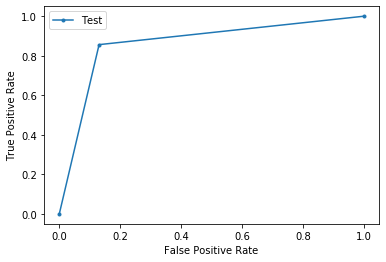

acc: 0.86284
True
f1: 0.8619509642095092
True
p: 0.8675743577275306
True
r: 0.8564
True
roc auc score: 0.86284


In [19]:
m = Metrics()
m.fit(lr_predicted, classes)
acc = accuracy_score(classes, lr_predicted)
f1 = f1_score(classes, lr_predicted)
p = precision_score(classes, lr_predicted)
r = recall_score(classes, lr_predicted)

fpr, tpr, _ = roc_curve(classes, lr_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print("acc: " + str(acc))
print(m.acc() == acc)
print("f1: " + str(f1))
print(m.f1() == f1)
print("p: " + str(p))
print(m.prec() == p)
print("r: " + str(r))
print(m.rec() == r)
print("roc auc score: " + str(roc_auc_score(classes, lr_predicted)))

In [20]:
indexes = get_top_indexes(lr_predicted_proba, True, 15)
get_top(indexes)

['OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the greatest show ever mad full stop.OZ is the

In [21]:
indexes = get_top_indexes(lr_predicted_proba, False, 15)
get_top(indexes)

['This was one of the best movies you could find as a child. I lived with The Chipmunk Adventure from 4 years old to 8 years old. The story of this film was: Dave\'s going on a business trip to Europe and sticks the boys with Miss Miller. While playing an Around the World in 80 Days video game, two villains, Klaus and Claudia (brother and sister), round the Chipmunks and Chipettes into an adventure in which the kids must hot-air-balloon their way across the globe. What they\'re unaware of is that the "game" is really a diamond-smuggling ring. And when found at the airport by the villains, a chase ensues! And which ends in Klaus and Claudia off to jail and Alvin, Simon, Theodore, Brittany, Jeanette, and Eleanor safe with Dave and Miss Miller. But I am warning you now, this is a musical and quite a damn good one at that. Most people hate musicals, but I am not one of those people, I frigging love musicals like Rocky Horror, Grease, Sound of Music, Cats Don\'t Dance, and just about anythi

#Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier().fit(X_train_counts, classes)

In [0]:
dt_predicted = dt_clf.predict(X_test)
dt_predicted_proba = dt_clf.predict_proba(X_test)

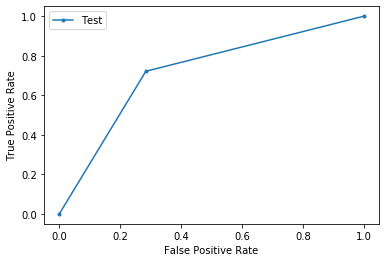

acc: 0.7186
True
f1: 0.7194416749750748
True
p: 0.7172962226640159
True
r: 0.7216
True
roc auc score: 0.7186


In [24]:
m = Metrics()
m.fit(dt_predicted, classes)
acc = accuracy_score(classes, dt_predicted)
f1 = f1_score(classes, dt_predicted)
p = precision_score(classes, dt_predicted)
r = recall_score(classes, dt_predicted)

fpr, tpr, _ = roc_curve(classes, dt_predicted)
pyplot.plot(fpr, tpr, marker='.', label='Test')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print("acc: " + str(acc))
print(m.acc() == acc)
print("f1: " + str(f1))
print(m.f1() == f1)
print("p: " + str(p))
print(m.prec() == p)
print("r: " + str(r))
print(m.rec() == r)
print("roc auc score: " + str(roc_auc_score(classes, dt_predicted)))

In [25]:
indexes = get_top_indexes(dt_predicted_proba, True, 15)
get_top(indexes)

['A "40 foot long" giant mutant squid with five tentacles, razor fangs and the ability to reproduce it\'s own cells terrorizes a small Florida town. Various marine biologists, doctors and cops plot to kill it. Meanwhile, a human monster named Miller offs people who discover the "Devilfish" is a manmade creation used for the greedy benefit of some evil doctors! Miller attacks a female researcher, strangles her, drowns her in the bathtub, tosses in a hairdryer, then rips the panties off her dead body!Lots of false alarms are set when our heroes Peter, Stella, Janet and Bob set out on a high tech (high tech for 1984, anyway) "Seaquarium" boat to catch the creature, who is frequently seen in close up or hilariously obvious speeded-up film to seem more menacing. And only fire can destroy it, which leads to a flamethrower-armed posse vs. aquatic beast finale.This JAWS cash-in is pretty tame (other than a legless corpse and a decapitation) but watchable and benefits from an excellent Antony B

In [26]:
indexes = get_top_indexes(dt_predicted_proba, False, 15)
get_top(indexes)

['This was one of the best movies you could find as a child. I lived with The Chipmunk Adventure from 4 years old to 8 years old. The story of this film was: Dave\'s going on a business trip to Europe and sticks the boys with Miss Miller. While playing an Around the World in 80 Days video game, two villains, Klaus and Claudia (brother and sister), round the Chipmunks and Chipettes into an adventure in which the kids must hot-air-balloon their way across the globe. What they\'re unaware of is that the "game" is really a diamond-smuggling ring. And when found at the airport by the villains, a chase ensues! And which ends in Klaus and Claudia off to jail and Alvin, Simon, Theodore, Brittany, Jeanette, and Eleanor safe with Dave and Miss Miller. But I am warning you now, this is a musical and quite a damn good one at that. Most people hate musicals, but I am not one of those people, I frigging love musicals like Rocky Horror, Grease, Sound of Music, Cats Don\'t Dance, and just about anythi

Результат: лучший классификатор - логистическая регрессия